In [1]:
%matplotlib inline
import pysal as ps
import numpy as np
import pandas as pd
import geopandas as gp
import shapely
import copy
import random
import acs_regionalization as ACS
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,20  #set the default map size
#rcParams['patch.linewidth'] = 0.5  #set default polygon line width

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # print all output, not just last

C:\Users\JollyKD\AppData\Local\Continuum\anaconda2\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


(-94.07652734999999, -92.66785964999998, 44.423966549999996, 45.46198044999999)

[]

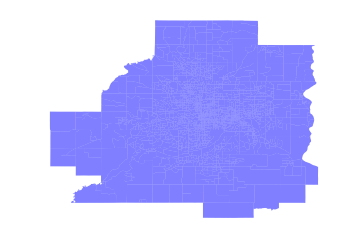

In [3]:
# read in the Ramsey shapefile and plot it   
shp_map = gp.read_file('metc_data/target/bg_metc.shp')
shp_map['constant'] = 1
p = shp_map.plot('constant', alpha=0.5, cmap='winter')
p.axis('off')
p.plot()

In [6]:
# read spatial data into python and run some diagnostics
w = ps.rook_from_shapefile('metc_data/target/bg_metc.shp', idVariable='GEOID')
print w.n   # number of block groups = 2085

2085


<BarContainer object of 18 artists>

Text(0.5,0,'number of neighbors')

Text(0,0.5,'number of block groups')

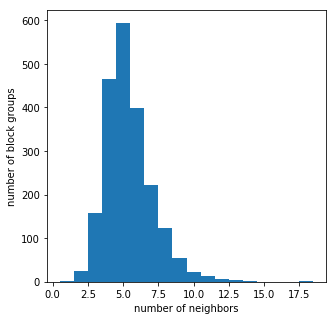

In [7]:
# summary of the connectivity structure of the Ramsey block groups
w_hist_data = np.array(w.histogram)
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(w_hist_data[:,0], w_hist_data[:,1], align='center', width=1)
ax.set_xlabel('number of neighbors')
ax.set_ylabel('number of block groups')
# shows, for example, that ~600 block groups have 5 neighbors

In [8]:
# read in list of census tracts to exclude
exclude = open('metc_data/target/exclude.csv')
exclude = exclude.readline()
exclude = exclude.replace('g','')
exclude = exclude.split(',')
print exclude

['271230408021', '271630708011', '271630708021', '271239800001']


In [10]:
# read in the ACS estimates and standard errors
population = pd.read_csv('metc_data/target/target_population.csv', index_col=0)

population.shape
population.head

est_prop = pd.read_csv('metc_data/target/target_estimates_metc.csv', index_col=0)
moe_prop = pd.read_csv('metc_data/target/target_moe_metc.csv', index_col=0)


(2085, 1)

<bound method DataFrame.head of               totalppl
id                    
270030501071      2723
270030501081      3786
270030501082      1433
270030501091      1735
270030501092      1124
270030501093      1128
270030501094      1293
270030501101      1306
270030501102      1347
270030501111      1553
270030501112      1800
270030501113       447
270030501141      1695
270030501142      1277
270030501151      1080
270030501152      1809
270030501153      1070
270030501154      1522
270030501161      1595
270030501162      1494
270030501163      1523
270030502081      1621
270030502082      1730
270030502101      1122
270030502102      1150
270030502103       883
270030502104       854
270030502151      2449
270030502152      1859
270030502161      2377
...                ...
271630710162      2700
271630710171      8111
271630710181      7503
271630710182      9164
271630711011       885
271630711012      1173
271630711013      1030
271630711014       502
271630711021      1078
27

In [ ]:
# EXCLUDE PLACES WITH ZERO POPULATION

shp = ps.open('metc_data/target/bg_metc.shp')
random.seed(789)     # to ensure we get the same solution each time
np.random.seed(789)  # to ensure we get the same solution each time
results = ACS.ACS_Regions(w=w,\
                          target_est_prop=est_prop.values,\
                          target_moe_prop=moe_prop.values,\
                          count_est=population.values,\
                          target_th_all=0.10,\
                          exclude=exclude,\
                          compactness=shp,\
                          cv_exclude_prop=0.05)
print 'regionalization finished'

utils.py:133: RuntimeWarning: divide by zero encountered in divide
  cv = sde / est
utils.py:86: RuntimeWarning: invalid value encountered in divide
  est = est_num / est_den
utils.py:88: RuntimeWarning: invalid value encountered in less_equal
  problems = inside_sqrt <= 0
utils.py:134: RuntimeWarning: invalid value encountered in less
  cv[est < cv_exclude_type] = 0.0
